In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/coleosborne/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
from newsapi import NewsApiClient
#api_key = "News_API"

In [3]:
load_dotenv()
api_key=os.getenv("News_API")
type(api_key) 


str

In [4]:
#News_API = os.getenv("News_API")
#type(News_API)

In [5]:
# Create a newsapi client
NewsAPI = NewsApiClient(api_key=api_key)

In [6]:
# Fetch the Bitcoin news articles
BTC_News_Articles = NewsAPI.get_everything(q="bitcoin",
                                          language="en",
                                          page_size=100,
                                          sort_by="relevancy")


In [7]:
# Fetch the Ethereum news articles
ETH_News_Articles = NewsAPI.get_everything(q="ethereum",
                                          language="en",
                                          page_size=100,
                                          sort_by="relevancy")

In [8]:
# Create the Bitcoin sentiment scores DataFrame
BTC_Sentiment_Score = []

for article in BTC_News_Articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment['pos']
        neu = sentiment ["neu"]
        neg = sentiment ['neg']
        
        BTC_Sentiment_Score.append({
            "text" : text,
            "date" : date,
            "compound" : compound,
            "pos" : pos,
            "neg" : neg,
            "neu" : neu
        })
        
    except AttributeError:
        pass

In [9]:
# BTC Dataframe
BTC_df = pd.DataFrame(BTC_Sentiment_Score)
BTC_df

,text,date,compound,pos,neg,neu
0,"Like Dogecoin devotees, the mayor of Reno, and...",2021-07-19,0.6908,0.178,0.000,0.822
1,Filed under:\r\nThe supply chain attack has re...,2021-07-05,-0.5719,0.111,0.184,0.705
2,image copyrightGetty Images\r\nThe gang behind...,2021-07-05,-0.6124,0.000,0.143,0.857
3,To get a roundup of TechCrunchs biggest and mo...,2021-07-23,0.6240,0.127,0.000,0.873
4,While retail investors grew more comfortable b...,2021-07-14,0.7264,0.164,0.000,0.836
...,...,...,...,...,...,...
95,Metropolitan police detectives investigating i...,2021-07-13,-0.5423,0.000,0.123,0.877
96,Speaking remotely at the B Word Conference tod...,2021-07-22,0.3818,0.073,0.000,0.927
97,A representation of the virtual cryptocurrency...,2021-07-21,0.0000,0.000,0.000,1.000
98,This article was translated from our Spanish e...,2021-07-29,-0.3400,0.000,0.070,0.930


In [10]:
# Create the Ethereum sentiment scores DataFrame
ETH_Sentiment_Score = []

for article in ETH_News_Articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment['pos']
        neu = sentiment ["neu"]
        neg = sentiment ['neg']
        
        ETH_Sentiment_Score.append({
            "text" : text,
            "date" : date,
            "compound" : compound,
            "pos" : pos,
            "neg" : neg,
            "neu" : neu
        })
        
    except AttributeError:
        pass

In [11]:
# Ethereum Dataframe
ETH_df = pd.DataFrame(ETH_Sentiment_Score)
ETH_df

,text,date,compound,pos,neg,neu
0,There are many blockchain platforms competing ...,2021-07-16,0.3612,0.075,0.000,0.925
1,Blockchain infrastructure startups are heating...,2021-07-29,-0.2411,0.000,0.061,0.939
2,While retail investors grew more comfortable b...,2021-07-14,0.7264,0.164,0.000,0.836
3,Cent was founded in 2017 as an ad-free creator...,2021-08-05,0.6956,0.190,0.000,0.810
4,Representation of the Ethereum virtual currenc...,2021-08-05,0.0000,0.000,0.000,1.000
...,...,...,...,...,...,...
95,"Representations of cryptocurrencies Bitcoin, E...",2021-07-16,0.0000,0.000,0.000,1.000
96,"LONDON/HONG KONG, Aug 5 (Reuters) - World stoc...",2021-08-05,0.3818,0.107,0.000,0.893
97,"Bitcoin extended gains past $32,000, continuin...",2021-07-21,0.5859,0.121,0.000,0.879
98,image copyrightGetty Images\r\nBitcoin has jum...,2021-07-22,0.1027,0.067,0.057,0.876


In [12]:
# Describe the Bitcoin Sentiment
BTC_df.describe()

,compound,pos,neg,neu
count,100.000000,100.000000,100.000000,100.000000
mean,0.091856,0.059140,0.033960,0.906890
std,0.394892,0.070527,0.058909,0.087044
min,-0.827100,0.000000,0.000000,0.653000
25%,-0.044250,0.000000,0.000000,0.852500
50%,0.000000,0.047000,0.000000,0.919500
75%,0.381800,0.092000,0.066250,1.000000
max,0.883400,0.276000,0.287000,1.000000


In [13]:
# Describe the Ethereum Sentiment
ETH_df.describe()

,compound,pos,neg,neu
count,100.000000,100.000000,100.00000,100.000000
mean,0.154366,0.055920,0.02012,0.923940
std,0.330502,0.063166,0.04262,0.073756
min,-0.812600,0.000000,0.00000,0.714000
25%,0.000000,0.000000,0.00000,0.872500
50%,0.000000,0.045000,0.00000,0.929000
75%,0.401900,0.094500,0.00000,1.000000
max,0.771700,0.201000,0.24900,1.000000


In [14]:
# Question 1
print(f"Bitcoin had the highest mean positive score of 0.059")
print(f"Bitcoin had the highest compound score of 0.883")
print(f"Bitcoin had the highest positive score of 0.276")
      

Bitcoin had the highest mean positive score of 0.059
Bitcoin had the highest compound score of 0.883
Bitcoin had the highest positive score of 0.276


In [15]:
# Natural Langauge Processing

In [16]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/coleosborne/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
lemmatizer = WordNetLemmatizer()

In [18]:
# Create a list of stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [19]:
# Expand the default stopwords list if necessary
# Code if adding words: 
sw_addons = {}

In [20]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a tokenized list of the words
    StopWords = set(stopwords.words('english'))
    # Convert the words to lowercase
    Lowercase = re.compile('[^a-zA-Z ]')
    # Remove the punctuation from text
    Punctuation = Lowercase.sub('', text)
    # Remove the stop words
    words = word_tokenize(Punctuation)
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in StopWords.union(sw_addons)]
   
   
    
    return tokens

In [21]:
# Create a new tokens column for Bitcoin
BTC_df["tokens"] = BTC_df["text"].apply(tokenizer)
BTC_df

,text,date,compound,pos,neg,neu,tokens
0,"Like Dogecoin devotees, the mayor of Reno, and...",2021-07-19,0.6908,0.178,0.000,0.822,"[like, dogecoin, devotee, mayor, reno, leader,..."
1,Filed under:\r\nThe supply chain attack has re...,2021-07-05,-0.5719,0.111,0.184,0.705,"[filed, underthe, supply, chain, attack, ha, r..."
2,image copyrightGetty Images\r\nThe gang behind...,2021-07-05,-0.6124,0.000,0.143,0.857,"[image, copyrightgetty, imagesthe, gang, behin..."
3,To get a roundup of TechCrunchs biggest and mo...,2021-07-23,0.6240,0.127,0.000,0.873,"[get, roundup, techcrunchs, biggest, important..."
4,While retail investors grew more comfortable b...,2021-07-14,0.7264,0.164,0.000,0.836,"[retail, investor, grew, comfortable, buying, ..."
...,...,...,...,...,...,...,...
95,Metropolitan police detectives investigating i...,2021-07-13,-0.5423,0.000,0.123,0.877,"[metropolitan, police, detective, investigatin..."
96,Speaking remotely at the B Word Conference tod...,2021-07-22,0.3818,0.073,0.000,0.927,"[speaking, remotely, b, word, conferencetoday,..."
97,A representation of the virtual cryptocurrency...,2021-07-21,0.0000,0.000,0.000,1.000,"[representation, virtual, cryptocurrency, ethe..."
98,This article was translated from our Spanish e...,2021-07-29,-0.3400,0.000,0.070,0.930,"[article, wa, translated, spanish, edition, us..."


In [22]:
ETH_df["tokens"] = ETH_df["text"].apply(tokenizer)
ETH_df

,text,date,compound,pos,neg,neu,tokens
0,There are many blockchain platforms competing ...,2021-07-16,0.3612,0.075,0.000,0.925,"[many, blockchain, platform, competing, invest..."
1,Blockchain infrastructure startups are heating...,2021-07-29,-0.2411,0.000,0.061,0.939,"[blockchain, infrastructure, startup, heating,..."
2,While retail investors grew more comfortable b...,2021-07-14,0.7264,0.164,0.000,0.836,"[retail, investor, grew, comfortable, buying, ..."
3,Cent was founded in 2017 as an ad-free creator...,2021-08-05,0.6956,0.190,0.000,0.810,"[cent, wa, founded, adfree, creator, network, ..."
4,Representation of the Ethereum virtual currenc...,2021-08-05,0.0000,0.000,0.000,1.000,"[representation, ethereum, virtual, currency, ..."
...,...,...,...,...,...,...,...
95,"Representations of cryptocurrencies Bitcoin, E...",2021-07-16,0.0000,0.000,0.000,1.000,"[representations, cryptocurrencies, bitcoin, e..."
96,"LONDON/HONG KONG, Aug 5 (Reuters) - World stoc...",2021-08-05,0.3818,0.107,0.000,0.893,"[londonhong, kong, aug, reuters, world, stock,..."
97,"Bitcoin extended gains past $32,000, continuin...",2021-07-21,0.5859,0.121,0.000,0.879,"[bitcoin, extended, gain, past, continuing, re..."
98,image copyrightGetty Images\r\nBitcoin has jum...,2021-07-22,0.1027,0.067,0.057,0.876,"[image, copyrightgetty, imagesbitcoin, ha, jum..."


In [23]:
# N-GRAMS and Frequency Analysis

In [24]:
#imports
from collections import Counter
from nltk import ngrams

In [25]:
# Generate the Bitcoin N-grams where N=2
BTC_Text = ''.join(BTC_df.text)
BTC_Processed = tokenizer(BTC_Text)
BTC_N_Grams=Counter(ngrams(BTC_Processed, n=2))
BTC_N_Grams.most_common(10)

[(('july', 'reuters'), 15),
 (('illustration', 'taken'), 13),
 (('taken', 'june'), 10),
 (('virtual', 'currency'), 8),
 (('illustration', 'picture'), 7),
 (('representation', 'virtual'), 6),
 (('currency', 'bitcoin'), 6),
 (('bitcoin', 'ethereum'), 5),
 (('bitcoin', 'seen'), 5),
 (('charsby', 'reuters'), 5)]

In [26]:
# Generate the Ethereum N-grams where N=2
ETH_Text = ''.join(ETH_df.text)
ETH_Processed = tokenizer(ETH_Text)
ETH_N_Grams = Counter(ngrams(ETH_Processed, n=2))
ETH_N_Grams.most_common(10)

[(('illustration', 'taken'), 22),
 (('taken', 'june'), 20),
 (('bitcoin', 'ethereum'), 15),
 (('june', 'reutersdado'), 15),
 (('pc', 'motherboard'), 14),
 (('cryptocurrencies', 'bitcoin'), 14),
 (('ethereum', 'dogecoin'), 14),
 (('placed', 'pc'), 13),
 (('motherboard', 'illustration'), 13),
 (('aug', 'reuters'), 12)]

In [27]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    #Changed N=3 to N=10 in the starter code as we want 10 words.
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [28]:
# Use token_count to get the top 10 words for Bitcoin
BTC_Top10_Words = token_count(BTC_Processed)
BTC_Top10_Words

[('bitcoin', 61),
 ('reuters', 33),
 ('cryptocurrency', 21),
 ('july', 21),
 ('illustration', 20),
 ('taken', 19),
 ('seen', 16),
 ('ha', 12),
 ('june', 12),
 ('cryptocurrencies', 11)]

In [29]:
ETH_Top10_Words = token_count(ETH_Processed)
ETH_Top10_Words

[('ethereum', 39),
 ('bitcoin', 27),
 ('reuters', 26),
 ('illustration', 24),
 ('taken', 23),
 ('cryptocurrency', 22),
 ('cryptocurrencies', 21),
 ('june', 20),
 ('reutersdado', 19),
 ('charsrepresentations', 15)]

In [30]:
# Word Clouds
#Imports
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

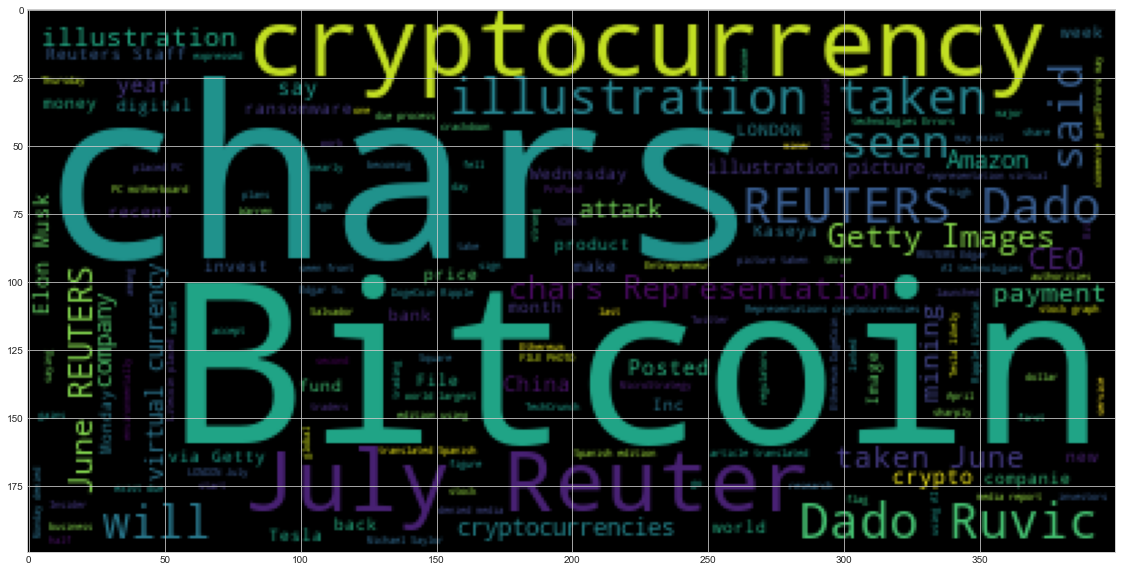

In [31]:
# Generate the Bitcoin word cloud
BTC_Word_Cloud = WordCloud().generate(BTC_Text)
plt.imshow(BTC_Word_Cloud)

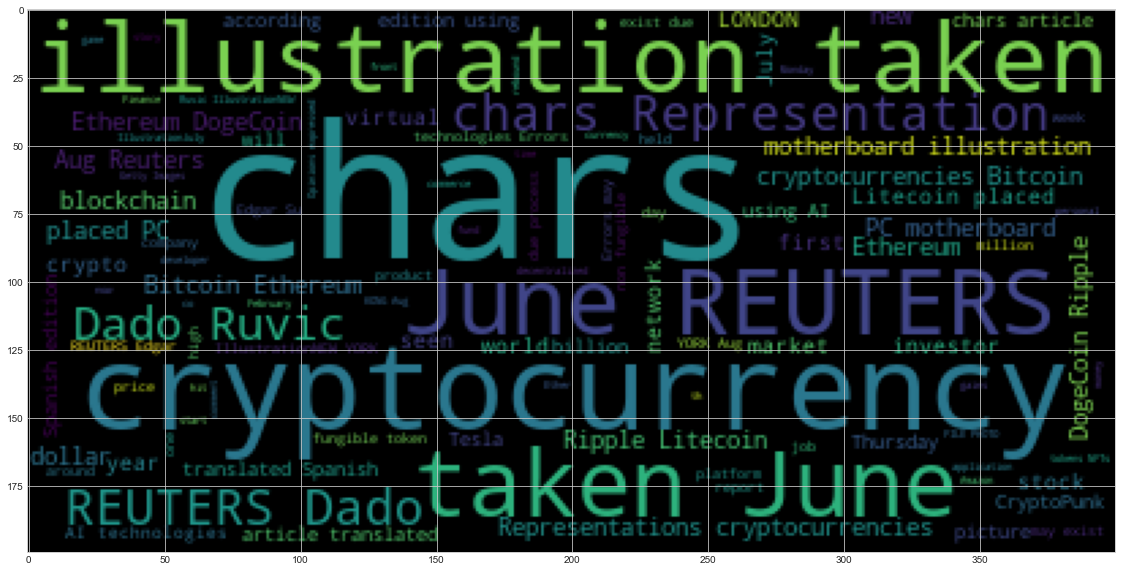

In [32]:
# Generate the Ethereum word cloud
ETH_Word_Cloud = WordCloud().generate(ETH_Text)
plt.imshow(ETH_Word_Cloud)

In [33]:
# Named Entity Recognition
import spacy
from spacy import displacy

In [34]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

In [35]:
# Bitcoin NER
# Concatenate all of the Bitcoin text together
Bitcoin_Text = ''.join(BTC_df.text)
Bitcoin_Text

'Like Dogecoin devotees, the mayor of Reno, and the leaders of El Salvador, Aldo Baoicchi is convinced cryptocurrency is the future. The CEO and founder of Canadian scooter maker Daymak believes this … [+4116 chars]Filed under:\r\nThe supply chain attack has reached over a thousand organizations.\r\nIllustration by Alex Castro / The Verge\r\nThree days after ransomware attackers started the holiday weekend by comprom… [+3376 chars]image copyrightGetty Images\r\nThe gang behind a "colossal" ransomware attack has demanded $70m (£50.5m) paid in Bitcoin in return for a "universal decryptor" that it says will unlock the files of all … [+4140 chars]To get a roundup of TechCrunchs biggest and most important stories delivered to your inbox every day at 3 p.m. PDT, subscribe here.\r\nHello and welcome to Daily Crunch for July 23, 2021. Its been an i… [+5456 chars]While retail investors grew more comfortable buying cryptocurrencies like Bitcoin and Ethereum in 2021, the decentralized application

In [36]:
# Run the NER processor on all of the text
BTC_NER_Processor = nlp(Bitcoin_Text)

In [37]:
#Add a Title
BTC_NER_Processor.user_data["title"] = "BTC NER"

In [38]:
# Render the visualization
displacy.render(BTC_NER_Processor, style="ent")

In [39]:
# List all Entities
for ent in BTC_NER_Processor.ents:
    print(ent.text, ent.label_)

Reno GPE
El Salvador GPE
Aldo Baoicchi GPE
Canadian NORP
Daymak ORG
Alex Castro PERSON
The Verge ORG
Three days DATE
the holiday weekend DATE
$70m MONEY
£50.5m MONEY
every day DATE
3 p.m. PDT TIME
Daily Crunch ORG
July 23, 2021 DATE
Bitcoin and Ethereum ORG
2021 DATE
Michael Arrington PERSON
TechCrunch LOC
Crunchbase ORG
CrunchFund PRODUCT
Tuesday DATE
2017 DATE
July 28 DATE
Reuters ORG
40,000 MONEY
Wednesday DATE
chars]James Martin PERSON
UK GPE
Spain GPE
Twitter PRODUCT
2020 DATE
the US Department of Justi ORG
November 19, 2020 DATE
REUTERS ORG
Dado Ruvic/IllustrationSINGAPORE ORG
July 21 DATE
Reuters ORG
Reuters ORG
FILE ORG
November 19, 2020 DATE
REUTERS ORG
Dado Ruvic/Illustration
SINGAPORE ORG
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
Ju PERSON
Dado Ruvic/Illustration
Welcome ORG
10 CARDINAL
the Opening Bell ORG
first ORDINAL
Entrepreneur ORG
first ORDINAL
more than three decades ago DATE
six months ago DATE
dozens CARDINAL
February 9, 2021 DATE
REUTERS ORG
Dado GPE
Reuter

In [40]:
#ETH NER
# Concatenate all of the Ethereum text together
Ethereum_Text = ''.join(ETH_df.text)
Ethereum_Text

'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote… [+2563 chars]Blockchain infrastructure startups are heating up as industry fervor brings more developers and users to a space that still feels extremely young despite a heavy institutional embrace of the crypto s… [+2468 chars]While retail investors grew more comfortable buying cryptocurrencies like Bitcoin and Ethereum in 2021, the decentralized application world still has a lot of work to do when it comes to onboarding a… [+2288 chars]Cent was founded in 2017 as an ad-free creator network that allows users to offer each other crypto rewards for good posts and comments — it’s like gifting awards on Reddit, but with Ethereum. But in… [+6228 chars]Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/

In [41]:
# Run the NER processor on all of the text
ETH_NER_Processor = nlp(Ethereum_Text)

In [42]:
# Add a title
ETH_NER_Processor.user_data["title"] = "ETH NER"

In [43]:
# Render the visualization
displacy.render(ETH_NER_Processor, style="ent")

In [44]:
# List all Entities
for ent in ETH_NER_Processor.ents:
    print(ent.text, ent.label_)

Ethereum PERSON
Ethereum Killers WORK_OF_ART
Solana PERSON
Bitcoin and Ethereum ORG
2021 DATE
2017 DATE
Reddit NORP
Ethereum PERSON
Ethereum PERSON
February 3, 2018 DATE
REUTERS ORG
Dado Ruvic PERSON
Aug 5 DATE
Reuters ORG
Aug 5 DATE
Reuters ORG
two-month DATE
Thursday DATE
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationAug 3 PERSON
Reuters ORG
Ethereum PERSON
Monday DATE
Amazon ORG
Amazon ORG
Di Iorio PERSON
Ethereum PERSON
Bloomberg PERSON
Slashdot NORP
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
July 30 DATE
Reuters ORG
second ORDINAL
more than $13 billion MONEY
2.0 CARDINAL
Photothek PERSON
more than $13 billion MONEY
2.0 CARDINAL
Livepeer PERSON
$20 million MONEY
Ethereum PERSON
Spanish NORP
AI ORG
Xoy Capital PERSON
Guadalajara GPE
Jalisco GPE
Xoycoin PERSON
Monday DATE
Chicago Bulls ORG
American Express ORG
Spanish NORP
AI ORG
The Securities and Exchange Commission ORG
London GPE
Ethereum PERSON
12 965 000 CARDINAL
August 3-5, 2021 DAT